## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.
> If it's exactly in between two options, select the higher value.

We recommend using python 3.12 or 3.13 in this homework.

In this homework, we're going to continue working with the lead scoring dataset. You don't need the dataset: we will provide the model for you.

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2025/05-deployment/homework.md

<b>new updatedt video</b> for this https://www.youtube.com/watch?v=jzGzw98Eikk&t=550s
How to Deploy Machine Learning Models with FastAPI, Docker, and Fly.io | End-to-End Tutorial

## Question 1

* Install `uv`
* What's the version of uv you installed?
* Use `--version` to find out


## Initialize an empty uv project 
<u>see the video above around 1h and 6 minutes to understand what I need to do</u>

You should create an empty folder for homework
and do it there. 

In [ ]:
!pip install uv

In [1]:
uv --version

uv 0.9.5 (d5f39331a 2025-10-21)
Note: you may need to restart the kernel to use updated packages.


## Question 2

* Use uv to install Scikit-Learn version 1.6.1 
* What's the first hash for Scikit-Learn you get in the lock file?
* Include the entire string starting with sha256:, don't include quotes


## Models

We have prepared a pipeline with a dictionary vectorizer and a model.

It was trained (roughly) using this code:

```python
categorical = ['lead_source']
numeric = ['number_of_courses_viewed', 'annual_income']

df[categorical] = df[categorical].fillna('NA')
df[numeric] = df[numeric].fillna(0)

train_dict = df[categorical + numeric].to_dict(orient='records')

pipeline = make_pipeline(
    DictVectorizer(),
    LogisticRegression(solver='liblinear')
)

pipeline.fit(train_dict, y_train)
```

> **Note**: You don't need to train the model. This code is just for your reference.

And then saved with Pickle. Download it [here](https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/cohorts/2025/05-deployment/pipeline_v1.bin).

With `wget`:

```bash
wget https://github.com/DataTalksClub/machine-learning-zoomcamp/raw/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin
```

pipenv: Automatically manages virtual environments for your project. If none exists, it creates one when you run pipenv install.

uv: This is a newer (and less common) tool for managing Python virtual environments. It does not automatically create a virtual environment unless you explicitly run uv venv.

### 2.1 Use uv to install Scikit-Learn version 1.6.1 

#### IN THE COMMAND LINE AND THE WORK FOLDER - IN CAS \05-Deploymenty\

1. uv venv - create the virtual environment first

2. uv init - initialize the project

3. uv add scikit-learn==1.6.1 - will add a uv.lock file with the  dependencies

### 2.2 What's the first hash for Scikit-Learn you get in the lock file?

In [9]:
file = open("C:/Users/guilh/ML Zoomcamp/05-Deployment/uv.lock", "r")
content = file.read()
#print(content)
#file.close()

<b>answer:</b> sha256:b4fc2525eca2c69a59260f583c56a7557c6ccdf8deafdba6e060f94c1c59738e

## Question 3

Let's use the model!

* Write a script for loading the pipeline with pickle
* Score this record:

```json
{
    "lead_source": "paid_ads",
    "number_of_courses_viewed": 2,
    "annual_income": 79276.0
}
```

What's the probability that this lead will convert? 

* 0.333
* 0.533
* 0.733
* 0.933

If you're getting errors when unpickling the files, check their checksum:

```bash
$ md5sum pipeline_v1.bin
7d17d2e4dfbaf1e408e1a62e6e880d49 *pipeline_v1.bin
```

In [6]:
# importing the model
!wget https://github.com/DataTalksClub/machine-learning-zoomcamp/raw/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin

--2025-10-26 11:02:02--  https://github.com/DataTalksClub/machine-learning-zoomcamp/raw/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin [following]
--2025-10-26 11:02:03--  https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/refs/heads/master/cohorts/2025/05-deployment/pipeline_v1.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1300 (1.3K) [application/octet-stream]
Saving to: 'pipeline_v1.bin'


In [7]:
import pickle

model_file = 'pipeline_v1.bin'

In [8]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)
dv, model

C:\Python\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DictVectorizer from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk.

(DictVectorizer(), LogisticRegression(solver='liblinear'))

In [12]:
client = {
    "lead_source": "paid_ads",
    "number_of_courses_viewed": 2,
    "annual_income": 79276.0
}

X = dv.transform([client])
model.predict_proba(X)[0,1]

np.float64(0.5336072702798061)

In [ ]:
#######################FULL SCRIPT######################################
import pickle

model_file = 'pipeline_v1.bin'

with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)
dv, model

client = {
    "lead_source": "paid_ads",
    "number_of_courses_viewed": 2,
    "annual_income": 79276.0
}

X = dv.transform([client])
model.predict_proba(X)[0,1]

In [16]:
# as a function

def predict_prob(model, dv, client):
    with open(model_file, 'rb') as f_in:
        dv, model = pickle.load(f_in)
    X = dv.transform([client])
    return model.predict_proba(X)[0,1]

In [17]:
predict_prob(model, dv, client)

np.float64(0.5336072702798061)

## Question 4

Now let's serve this model as a web service

* Install FastAPI
* Write FastAPI code for serving the model
* Now score this client using `requests`:

```python
url = "YOUR_URL"
client = {
    "lead_source": "organic_search",
    "number_of_courses_viewed": 4,
    "annual_income": 80304.0
}
requests.post(url, json=client).json()
```

What's the probability that this client will get a subscription?

* 0.334
* 0.534
* 0.734
* 0.934

### Other notes

1️⃣ Install FastAPI and Uvicorn

<u>Open Command Prompt or PowerShell and run:</u>

<b>pip install fastapi "uvicorn[standard]"</b>

2️⃣ Create your FastAPI app

<u>Create a file named main.py and add:</u>

from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def read_root():
    return {"Hello": "World"}

3️⃣ Run your app

<u>In the same folder as main.py, run:</u>

uvicorn main:app --reload


--reload → auto-reloads when you change your code

4️⃣ Access your app

Open http://127.0.0.1:8000
 → You’ll see: {"Hello": "World"}

Open http://127.0.0.1:8000/docs
 → Interactive API docs

✅ Done! FastAPI is running locally on Windows.


In [ ]:
# 1º Create the APP , python file (homework_app.py- the name doesn't matter what matter is the instance of the object name that is app_H5)
# that will be initialized on the command line in the step 2º

from fastapi import FastAPI
import pickle

# Load your model and DictVectorizer
model_file = 'pipeline_v1.bin'
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

app_H5 = FastAPI()

@app_H5.post("/predict")
def predict(client: dict):
    # Transform the client dict directly
    X = dv.transform([client])
    pred_proba = model.predict_proba(X)[0, 1]
    return {"prediction": float(pred_proba)}


In [ ]:
#  my iwrking directory
cd C:\Users\guilh\ML Zoomcamp\05-Deployment

In [ ]:
#2º Run this in the command line to initialize the app
uvicorn homework_app:app_H5 --reload

In [30]:
import requests

url = "http://127.0.0.1:8000/predict"

client = {
    "lead_source": "organic_search",
    "number_of_courses_viewed": 4,
    "annual_income": 80304.0
}

response = requests.post(url, json=client)
print(response.json())


{'prediction': 0.5340417283801275}


In [20]:
#What is in my main.py file in the working directory 
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def read_root():
    return {"Hello": "World"}

In [25]:
import requests

response = requests.get("http://127.0.0.1:9695/")
print(response.json())


{'Hello': 'World'}


## Docker

Install [Docker](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/05-deployment/06-docker.md). 
We will use it for the next two questions.

For these questions, we prepared a base image: `agrigorev/zoomcamp-model:2025`. 
You'll need to use it (see Question 5 for an example).

This image is based on `3.13.5-slim-bookworm` and has
a pipeline with logistic regression (a different one)
as well a dictionary vectorizer inside. 

This is how the Dockerfile for this image looks like:

```docker 
FROM python:3.13.5-slim-bookworm
WORKDIR /code
COPY pipeline_v2.bin .
```

We already built it and then pushed it to [`agrigorev/zoomcamp-model:2025`](https://hub.docker.com/r/agrigorev/zoomcamp-model).

> **Note**: You don't need to build this docker image, it's just for your reference.

## Question 5

Download the base image `agrigorev/zoomcamp-model:2025`. You can easily make it by using [docker pull](https://docs.docker.com/engine/reference/commandline/pull/) command.

So what's the size of this base image?

* 45 MB
* 121 MB
* 245 MB
* 330 MB

You can get this information when running `docker images` - it'll be in the "SIZE" column.


### To get the Docker image:
1) <u>Open Docker</u>
2) <u>In the left side pannel click Images and in the search bar paste agrigorev/zoomcamp-model:2025 an click pull</u>


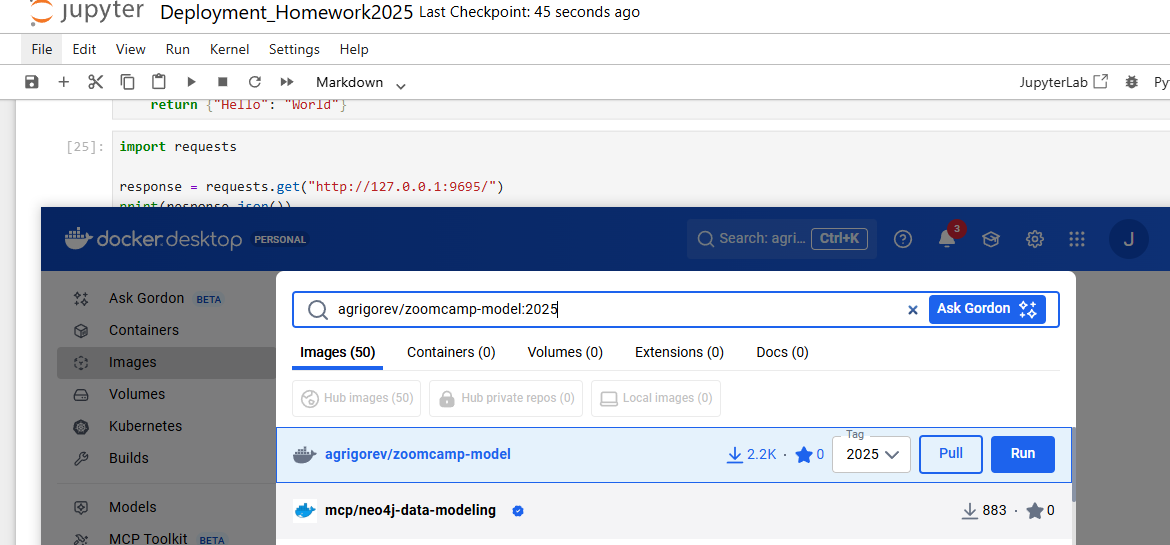

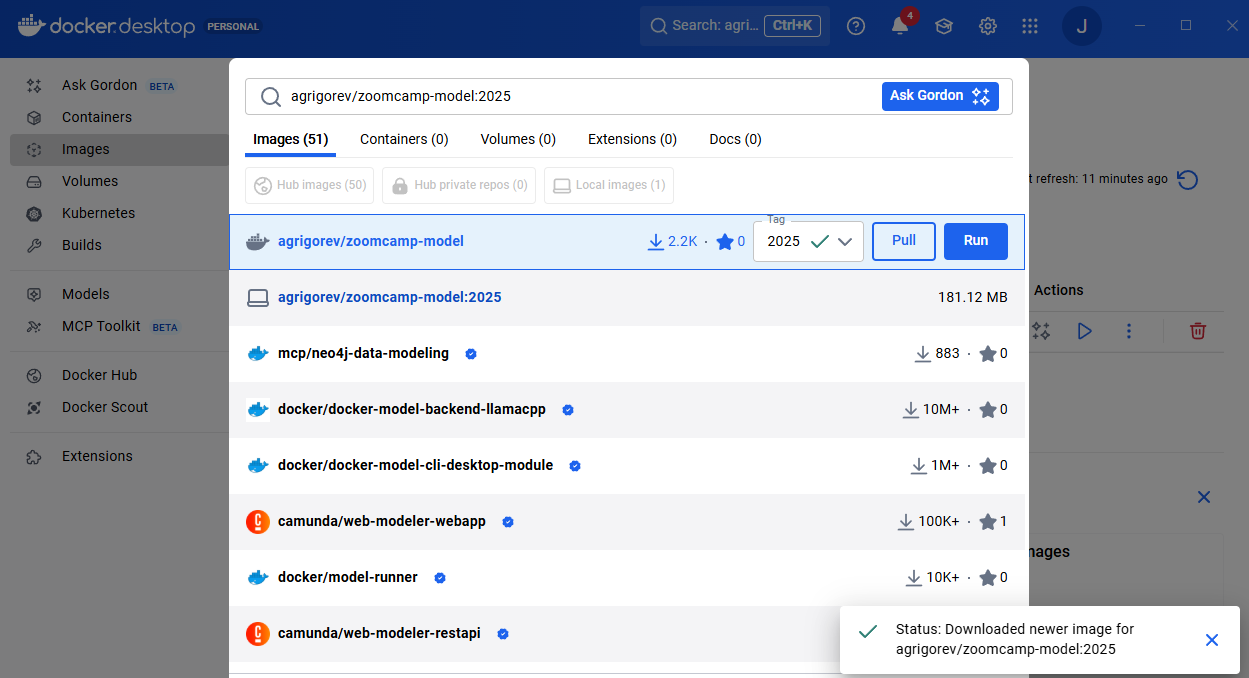

In [3]:
!docker --version

Docker version 28.5.1, build e180ab8


In [7]:
!docker images


REPOSITORY                 TAG       IMAGE ID       CREATED      SIZE
agrigorev/zoomcamp-model   2025      14d79fde0bbf   5 days ago   181MB


In [8]:
# test that shell commands work in Jupyter
!echo "Hello from shell"

"Hello from shell"


When you run this command (!docker run -p 8000:8000 agrigorev/zoomcamp-model:2025):

Docker creates a new container from the image.

It sets up networking so the container port 8000 maps to your host port 800

In [10]:
!docker run -p 8000:8000 agrigorev/zoomcamp-model:2025


## Dockerfile

Now create your own `Dockerfile` based on the image we prepared.

It should start like that:

```docker
FROM agrigorev/zoomcamp-model:2025
# add your stuff here
```

Now complete it:

* Install all the dependencies from pyproject.toml
* Copy your FastAPI script
* Run it with uvicorn 

After that, you can build your docker image.

*********************************************************************************************
A Dockerfile is a text file that contains instructions for Docker to create a Docker image.

Think of it as a recipe: it tells Docker what base environment to use, what files to include, what dependencies to install, and how to run your application.

Docker then reads this file and produces an image, which is a self-contained package that can run anywhere.
****************************************************************************************************

### Step 1: Organize your project ( Create Dockerfile and requeirements)

In [15]:
python --version

NameError: name 'python' is not defined

In [18]:
dockerfile_content = """
# Use official Python 3.12 slim image
FROM python:3.12-slim

WORKDIR /app

# Install build tools for packages like scikit-learn
RUN apt-get update && apt-get install -y \
    build-essential \
    && rm -rf /var/lib/apt/lists/*

# Upgrade pip first
RUN pip install --upgrade pip

# Copy requirements and install dependencies
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Copy code and model
COPY . .

EXPOSE 8000

CMD ["uvicorn", "homework_app:app_H5", "--host", "0.0.0.0", "--port", "8000"]
"""

# Save it to a file named 'Dockerfile'
with open("Dockerfile", "w") as f:
    f.write(dockerfile_content)

print("Dockerfile created successfully!")

Dockerfile created successfully!


In [ ]:
# requirements.txt
fastapi==0.111.1
uvicorn==0.38.0
scikit-learn==1.7.2

## **Step 2: Build the Docker image**

Open a terminal in your project folder and run:

In [ ]:
# in the working directory run the following in the command line to build the image
docker build -t fastapi-homework-app .

#### After the command above is run in the terminal  and was successfull in the Docker interface we can see a new image:</u>

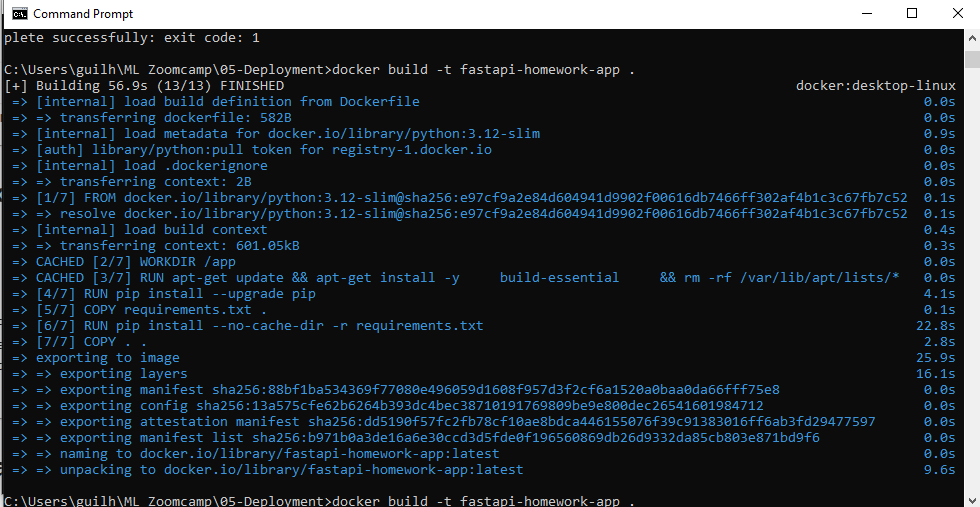

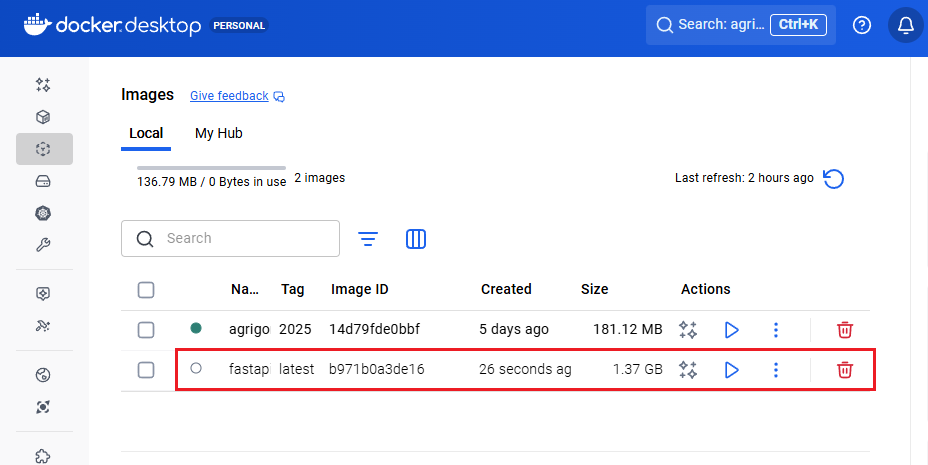

## **Step 3: Run the Docker container**

Once the image is built, run:

```bash
docker run -d -p 8000:8000 fastapi-homework-app
```

* -d → runs the container in detached mode (in the background).

* Docker prints the container ID, which is a long alphanumeric string, e.g.:

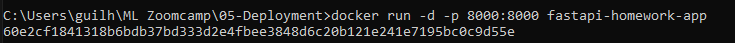

## **Step 4: Test your FastAPI app on the browser**

1. Open in a browser or use `curl`/Postman.
2. FastAPI automatically generates docs at:

```
http://localhost:8000/docs
```


---

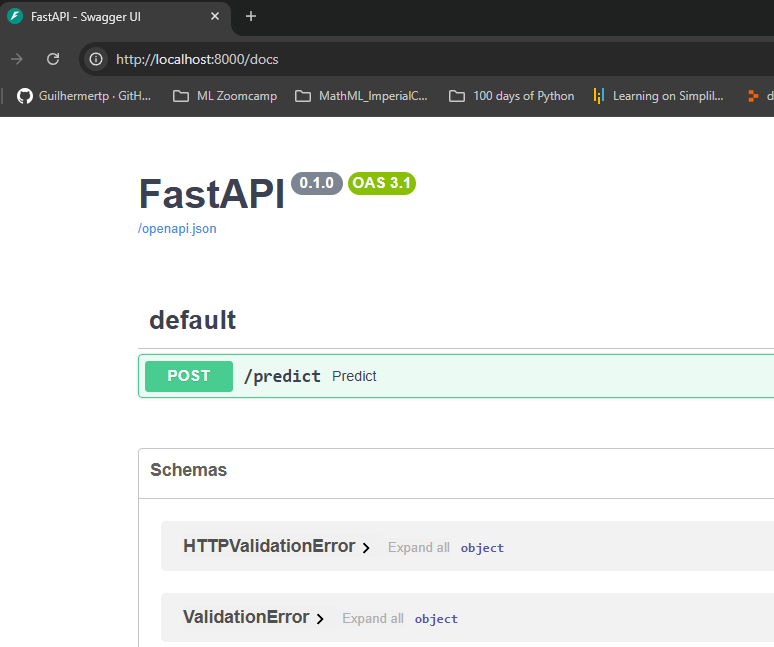

## **Step 5: Test /predict endpoint with JSON data**

You can send a POST request to `/predict` with JSON data like:

```json
{
  "lead_source": "organic_search",
  "number_of_courses_viewed": 4,
  "annual_income": 80304.0
}
```

(adjust keys to match what your model expects).


### TEST on Swagger

<u><b>Paste the following and click execute:</b></u>

{
  "lead_source": "organic_search",
  "number_of_courses_viewed": 4,
  "annual_income": 80304.0
}

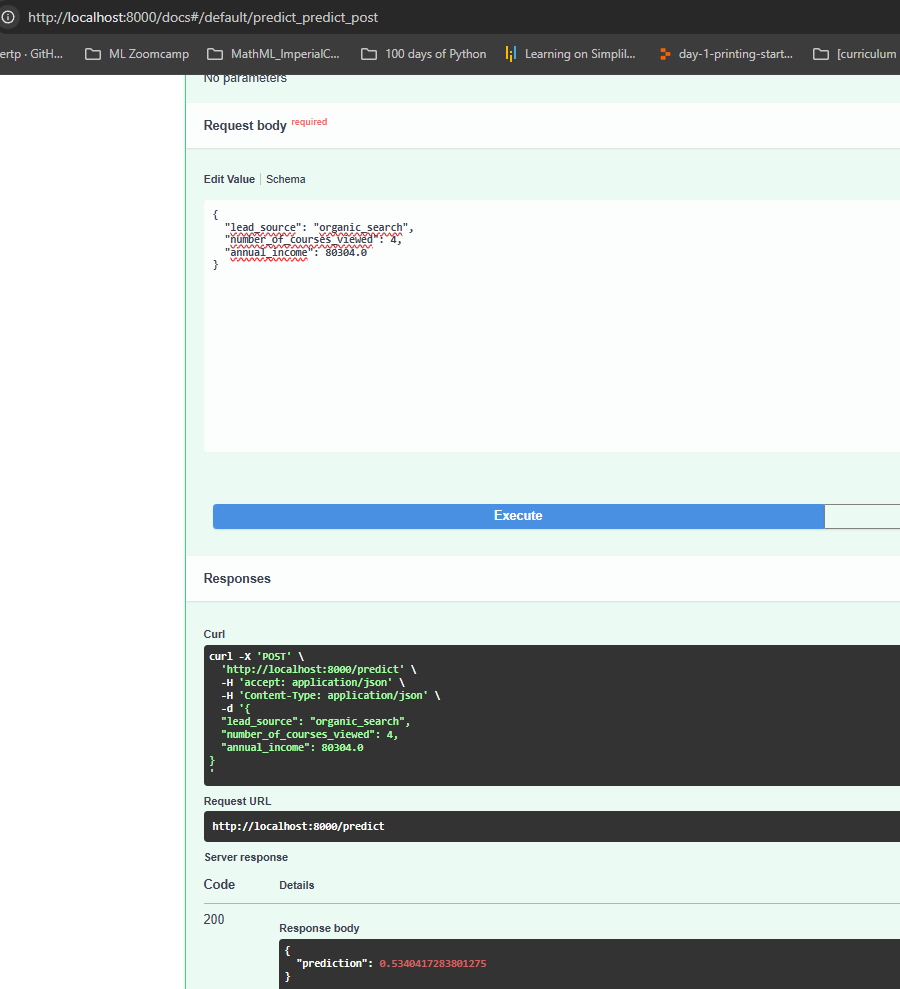



### ✅ Summary of Steps

1. Organize project with `homework_app.py`, `pipeline_v1.bin`, `requirements.txt`, `Dockerfile`.
2. Build Docker image: `docker build -t fastapi-homework-app .`
3. Run container: `docker run -d -p 8000:8000 fastapi-homework-app`
4. Open Swagger docs: `http://localhost:8000/docs`
5. Test `/predict` endpoint with JSON data.

---

## Question 6

Let's run your docker container!

After running it, score this client once again:

```python
url = "YOUR_URL"
client = {
    "lead_source": "organic_search",
    "number_of_courses_viewed": 4,
    "annual_income": 80304.0
}
requests.post(url, json=client).json()
```

What's the probability that this lead will convert?

* 0.39
* 0.59
* 0.79
* 0.99




In [19]:
·# We can run this because hte docker container is already running
import requests

url = "http://localhost:8000/predict"

client = {
    "lead_source": "organic_search",
    "number_of_courses_viewed": 4,
    "annual_income": 80304.0
}

response = requests.post(url, json=client)
print(response.json())


{'prediction': 0.5340417283801275}


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw05
* If your answer doesn't match options exactly, select the closest one. If the answer is exactly in between two options, select the higher value.



## Publishing to Docker hub

This is just for reference, this is how we published an image to Docker hub.

`Dockerfile_base`: 

```dockerfile
FROM python:3.13.5-slim-bookworm
WORKDIR /code
COPY pipeline_v2.bin .
```

Publishing:

```bash
docker build -t mlzoomcamp2025_hw5 -f Dockerfile_base .
docker tag mlzoomcamp2025_hw5:latest agrigorev/zoomcamp-model:2025
docker push agrigorev/zoomcamp-model:2025
```